In [6]:
from PIL import Image
import numpy as np
import requests

# loading input and resize if needed
# image = Image.open("https://github.com/dkedar7/Data-Analyzer/blob/master/Analyzer/assets/Demo.png")
url = "https://github.com/dkedar7/Data-Analyzer/blob/master/Analyzer/assets/Demo.png?raw=true"
image = Image.open(requests.get(url, stream=True).raw)
size_reduction_factor = 1 
image = image.resize((int(image.size[0] / size_reduction_factor), int(image.size[1] / size_reduction_factor)), Image.ANTIALIAS)

# Preprocess image
x = np.array(image).astype('float32')
x = np.transpose(x, [2, 0, 1])
x = np.expand_dims(x, axis=0)

In [8]:
output_name = session.get_outputs()[0].name
input_name = session.get_inputs()[0].name
result = session.run([output_name], {input_name: x})[0][0] 

# postprocess
result = np.clip(result, 0, 255)
result = result.transpose(1,2,0).astype("uint8")
img = Image.fromarray(result)
img

NameError: name 'session' is not defined

In [10]:
import onnxruntime as nxrun
model_path = 'models'
sess = nxrun.InferenceSession(model_path+"/mosaic-9.onnx")

InvalidProtobuf: [ONNXRuntimeError] : 7 : INVALID_PROTOBUF : Load model from models/mosaic-9.onnx failed:Protobuf parsing failed.

In [13]:
import onnx

onnx_model = onnx.load(model_path+"/mosaic-9.onnx")

/home/kedardabhadkar/.local/lib/python3.7/site-packages/onnx/__init__.py:99: RuntimeWarning: Unexpected end-group tag: Not all data was converted
  decoded = cast(Optional[int], proto.ParseFromString(s))


DecodeError: Protobuf decoding consumed too few bytes: 84 out of 107821

In [5]:
from style_transfer import neural_style
from style_transfer import utils
from PIL import Image
import base64

In [2]:
with open("pivottablejs.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())

In [3]:
# neural_style.stylize("pivottablejs.png", model="saved_models/udnie.pth", content_scale=2)
output_str = neural_style.stylize(encoded_string, model="saved_models/udnie.pth", content_scale=2)

In [9]:
with open("imageToSave.png", "wb") as fh:
    fh.write(base64.decodebytes(output_str))

In [10]:
output_str.decode("utf-8")

'iVBORw0KGgoAAAANSUhEUgAAA+AAAAGsCAIAAADSQFoUAAEAAElEQVR4nHz9WbMsWZYehn3fWnu7x3CmO+e9N+fMGrK6pu7qAT0BEEDAmhIhQJAgEJKBkkiTaJSZXqUH6T/oSTKTSTKjmWSSSIgiSBEAmwAxdDeq0QO6qrtr6Joys7JyvPOZIsLd91pLD9s9Is7Nok5W3RMnItx9D2v41rj5q//u352XAUMGQnJ7PS1SuqYiLdohxWZ+CeQF25bezmaLpCtuWkqrR1h6NKk1kY0PxQbzJDlSScKWcxOl9x1hHGaWwmfF+3XXyTyd5DY1gywbMadz1XWX67PNpi/e6NqNs77pV/asbLrLfrNYuQ+C1hlEaF+64aIvaw7duhQzLyKaFFml0ItEMzQgSvTSaztv7hwvny7O7t+789k3Xvvim6/cOLqxuNFenq/DGYMbJAAApKiIiogyUaiSkiTkLrom8fzU//AbX/+T73yfj9rvn35vdngwG2YdLbkECQYYBBMIJWgECQIRiAAiIiI8wtzdwyPcPSLcIxAAOI6BQL2S9XohOd6LQpAUjJ8Coai/gwgBACiUERHugHsgCKdTgiAUYCA8EIiI8GlsAOoijPebRuKIQPg4fvcQszJEUSaJ5OKAUzWxUQoZwiSMRpVwIJTIIpJTkhCdJZHFfJlbWTSLvGxeuvP6wfWDe/futN5c2nq4KOeXFxfPnvZ9ebp59u6Dj549OC2b9bO+bIbL1dN+fbk6Xz88nJ+surU0eZHTQCc1QqIFREklIiSSqAgSjB4CCpkUSiVIUiQlUYiSpKhMi8u6CYy6CWDUTZlWZfcvp63iuDvj671PAQRBBKKuN0gPDwvUtYmY1j08PAJgJQmCEeJhlQTG7xAk43kSkS2hjOMnxn+4HfuOup774fTp7i/E3oXTu3XWmJZn74/977Lea5xXAGQlchIBBtyDlN3nYHjUmW2JEOS4KrvnMRC7We+xyu713jh/2hx/ylu

In [6]:
from callbacks import *
import base64
from PIL import Image
import numpy as np
import requests

In [7]:
with open("pivottablejs.png", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())

In [8]:
o = stylize_image(encoded_string)

In [11]:
Image.frombytes(o)

TypeError: frombytes() missing 2 required positional arguments: 'size' and 'data'

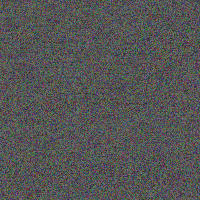

In [17]:
Image.frombytes("RGB", (200, 200), o)

In [18]:
from style_transfer import neural_style
from style_transfer import utils

map_style_model_path = {'Candy':'saved_models/candy.pth',
                        'Mosaic':'saved_models/mosaic.pth',
                        'Rain Princess':'saved_models/rain_princess.pth',
                        'Udnie': 'saved_models/udnie.pth'}

def stylize_image(input_image_b64_str):
    image_str = neural_style.stylize(input_image_b64_str, model="saved_models/candy.pth", content_scale=2)
    return image_str

In [29]:
o2 = neural_style.stylize(encoded_string, model="saved_models/mosaic.pth", content_scale=2)

RuntimeError: [enforce fail at CPUAllocator.cpp:71] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 109419520 bytes. Error code 12 (Cannot allocate memory)

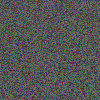

In [27]:
Image.frombytes("RGB", (100, 100), o2)